In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
import os
import re
from glob import glob
import pandas as pd
import numpy as np
import random

from tqdm import tqdm
import os
import pickle

# Math
import numpy as np
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
import librosa


warnings.filterwarnings('ignore')
%matplotlib inline

SEED = 34

# pickle savedata
def save_data(df, filename):
    filename = os.path.join('./pickle', filename)
    with open(filename, "wb" ) as file:
        pickle.dump(df, file)

# pickle load data
def load_data(filename):
    filename = os.path.join('./pickle', filename)
    with open(filename, "rb" ) as file:
        return pickle.load(file)
    
def save(data):
    save_data(data, 'tmp')

def load():
    return load_data('tmp')

def check_shape(all_data):
    a = load()
    assert a.shape[0] == all_data.shape[0]

In [2]:
train_audio_path = './train/audio/'
filename = 'yes/0a7c2a8d_nohash_0.wav'

In [3]:
sample_rate, samples = wavfile.read(str(train_audio_path) + filename)

In [4]:
sample_rate

16000

In [5]:
samples

array([ 14,  -7, -14, ...,  19,  20,  27], dtype=int16)

## librosa import audio file

In [6]:
sample, sample_rate = librosa.load(train_audio_path + filename, sr=16000)

In [7]:
sample.shape

(16000,)

In [8]:
sample_rate

16000

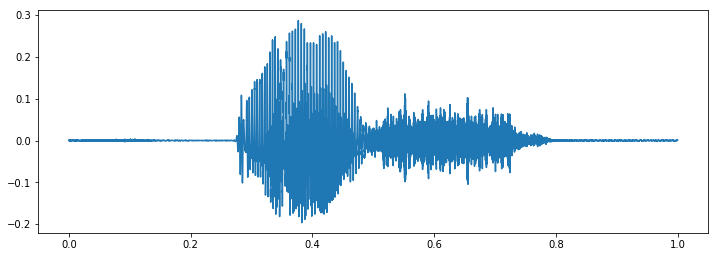

In [9]:
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(211)
ax.plot(np.linspace(0, 1, 16000), sample)

## Spectrum

In [15]:
POSSIBLE_LABELS = 'yes no up down left right on off stop go unknown silence'.split()

In [16]:
id2name = {i: name for i, name in enumerate(POSSIBLE_LABELS)}
name2id = {name: i for i, name in id2name.items()}

In [17]:
id2name

{0: 'yes',
 1: 'no',
 2: 'up',
 3: 'down',
 4: 'left',
 5: 'right',
 6: 'on',
 7: 'off',
 8: 'stop',
 9: 'go',
 10: 'unknown',
 11: 'silence'}

In [18]:
name2id

{'yes': 0,
 'no': 1,
 'up': 2,
 'down': 3,
 'left': 4,
 'right': 5,
 'on': 6,
 'off': 7,
 'stop': 8,
 'go': 9,
 'unknown': 10,
 'silence': 11}

In [21]:
def load_data(data_dir):
    """ Return 2 lists of tuples:
    [(class_id, user_id, path), ...] for train
    [(class_id, user_id, path), ...] for validation
    """
    # Just a simple regexp for paths with three groups:
    # prefix, label, user_id
    pattern = re.compile("(.+\/)?(\w+)\/([^_]+)_.+wav")
    all_files = glob(os.path.join(data_dir, 'train/audio/*/*wav'))

    with open(os.path.join(data_dir, 'train/validation_list.txt'), 'r') as fin:
        validation_files = fin.readlines()
    valset = set()
    for entry in validation_files:
        r = re.match(pattern, entry)
        if r:
            valset.add(r.group(3))
            
    with open(os.path.join(data_dir, 'train/testing_list.txt'), 'r') as fin:
        testing_files = fin.readlines()
    testset = set()
    for entry in testing_files:
        r = re.match(pattern, entry)
        if r:
            testset.add(r.group(3))

    possible = set(POSSIBLE_LABELS)
    train, val, test = [], [], []
    for entry in all_files:
        r = re.match(pattern, entry)
        if r:
            label, uid = r.group(2), r.group(3)
            if label == '_background_noise_':
                label = 'silence'
            elif label not in possible:
                label = 'unknown'

            label_id = name2id[label]

            sample = (label, label_id, uid, entry)
            if uid in valset:
                val.append(sample)
            elif uid in testset:
                test.append(sample)
            else:
                train.append(sample)

    print('There are {} train, {} val, and {} test samples'.format(len(train), len(val), len(test)))
    
    columns_list = ['label', 'label_id', 'user_id', 'wav_file']
    
    train_df = pd.DataFrame(train, columns = columns_list)
    valid_df = pd.DataFrame(val, columns = columns_list)
    test_df = pd.DataFrame(test, columns = columns_list)
    
    return train_df, valid_df, test_df

train_df, valid_df, test_df = load_data('')

There are 51094 train, 6798 val, and 6835 test samples


In [22]:
train_df

label  label_id   user_id                                wav_file
0      unknown        10  6b7d5101  train/audio/zero/6b7d5101_nohash_1.wav
1      unknown        10  92a9c5e6  train/audio/zero/92a9c5e6_nohash_1.wav
2      unknown        10  8c888bbb  train/audio/zero/8c888bbb_nohash_0.wav
3      unknown        10  531a5b8a  train/audio/zero/531a5b8a_nohash_0.wav
4      unknown        10  48a9f771  train/audio/zero/48a9f771_nohash_0.wav
...        ...       ...       ...                                     ...
51089  unknown        10  772db621   train/audio/six/772db621_nohash_0.wav
51090  unknown        10  6ac35824   train/audio/six/6ac35824_nohash_0.wav
51091  unknown        10  db7c95b0   train/audio/six/db7c95b0_nohash_0.wav
51092  unknown        10  38d78313   train/audio/six/38d78313_nohash_0.wav
51093  unknown        10  73f0c1f7   train/audio/six/73f0c1f7_nohash_0.wav

[51094 rows x 4 columns]

In [23]:
valid_df

label  label_id   user_id                                wav_file
0     unknown        10  bdee441c  train/audio/zero/bdee441c_nohash_0.wav
1     unknown        10  c50225fa  train/audio/zero/c50225fa_nohash_1.wav
2     unknown        10  48bfde8e  train/audio/zero/48bfde8e_nohash_0.wav
3     unknown        10  d197e3ae  train/audio/zero/d197e3ae_nohash_0.wav
4     unknown        10  c90c0105  train/audio/zero/c90c0105_nohash_1.wav
...       ...       ...       ...                                     ...
6793  unknown        10  27b9a84f   train/audio/six/27b9a84f_nohash_0.wav
6794  unknown        10  d197e3ae   train/audio/six/d197e3ae_nohash_3.wav
6795  unknown        10  ad63d93c   train/audio/six/ad63d93c_nohash_3.wav
6796  unknown        10  dca2797e   train/audio/six/dca2797e_nohash_2.wav
6797  unknown        10  471a0925   train/audio/six/471a0925_nohash_3.wav

[6798 rows x 4 columns]

In [25]:
train_df['label'].value_counts()

unknown    32550
stop        1885
on          1864
go          1861
yes         1860
no          1853
right       1852
up          1843
down        1842
off         1839
left        1839
silence        6
Name: label, dtype: int64

In [26]:
silence_files = train_df[train_df.label == 'silence']
train_df      = train_df[train_df.label != 'silence']

POSSIBLE_LABELS = train_df.label.unique().tolist()

from scipy.io import wavfile

def read_wav_file(fname):
    _, wav = wavfile.read(fname)
    wav = wav.astype(np.float32) / np.iinfo(np.int16).max
    return wav

silence_data = np.concatenate([read_wav_file(x) for x in silence_files.wav_file.values])

In [28]:
_, wav = wavfile.read("train/audio/happy/1dce06e8_nohash_1.wav")
wav = wav.astype(np.float32) / np.iinfo(np.int16).max

In [29]:
wav

array([0.00210578, 0.00436415, 0.00473037, ..., 0.00250252, 0.00250252,
       0.00317392], dtype=float32)

In [27]:
silence_data

array([-0.05389569, -0.49336222, -0.533372  , ...,  0.45954773,
        0.25641653,  0.5492721 ], dtype=float32)

In [30]:
from scipy.signal import stft


def process_wav_file(fname):
    wav = read_wav_file(fname)
    
    L = 16000  # 1 sec
    
    if len(wav) > L:
        i = np.random.randint(0, len(wav) - L)
        wav = wav[i:(i+L)]
    elif len(wav) < L:
        rem_len = L - len(wav)
        i = np.random.randint(0, len(silence_data) - rem_len)
        silence_part = silence_data[i:(i+L)]
        j = np.random.randint(0, rem_len)
        silence_part_left  = silence_part[0:j]
        silence_part_right = silence_part[j:rem_len]
        wav = np.concatenate([silence_part_left, wav, silence_part_right])
    
    specgram = stft(wav, 16000, nperseg = 400, noverlap = 240, nfft = 512, padded = False, boundary = None)
    phase = np.angle(specgram[2]) / np.pi
    amp = np.log1p(np.abs(specgram[2]))
    
    return np.stack([phase, amp], axis = 2)

In [31]:
fname = "train/audio/happy/1dce06e8_nohash_1.wav"
wav = read_wav_file(fname)

L = 16000  # 1 sec

if len(wav) > L:
    i = np.random.randint(0, len(wav) - L)
    wav = wav[i:(i+L)]
elif len(wav) < L:
    rem_len = L - len(wav)
    i = np.random.randint(0, len(silence_data) - rem_len)
    silence_part = silence_data[i:(i+L)]
    j = np.random.randint(0, rem_len)
    silence_part_left  = silence_part[0:j]
    silence_part_right = silence_part[j:rem_len]
    wav = np.concatenate([silence_part_left, wav, silence_part_right])

specgram = stft(wav, 16000, nperseg = 400, noverlap = 240, nfft = 512, padded = False, boundary = None)
phase = np.angle(specgram[2]) / np.pi #Return the angle of the complex argument.
amp = np.log1p(np.abs(specgram[2]))

## Make Batch

In [32]:
from keras.utils import to_categorical


def train_generator(train_batch_size):
    while True:
        this_train = train_df.groupby('label_id').apply(lambda x: x.sample(1800))
        shuffled_ids = random.sample(range(this_train.shape[0]), this_train.shape[0])
        for start in range(0, len(shuffled_ids), train_batch_size):
            x_batch = []
            y_batch = []
            end = min(start + train_batch_size, len(shuffled_ids))
            i_train_batch = shuffled_ids[start:end]
            for i in i_train_batch:
                x_batch.append(process_wav_file(this_train.wav_file.values[i]))
                y_batch.append(this_train.label_id.values[i])
            x_batch = np.array(x_batch)
            y_batch = to_categorical(y_batch, num_classes = len(POSSIBLE_LABELS))
            yield x_batch, y_batch

            
def valid_generator(val_batch_size):
    while True:
        ids = list(range(valid_df.shape[0]))
        for start in range(0, len(ids), val_batch_size):
            x_batch = []
            y_batch = []
            end = min(start + val_batch_size, len(ids))
            i_val_batch = ids[start:end]
            for i in i_val_batch:
                x_batch.append(process_wav_file(valid_df.wav_file.values[i]))
                y_batch.append(valid_df.label_id.values[i])
            x_batch = np.array(x_batch)
            y_batch = to_categorical(y_batch, num_classes = len(POSSIBLE_LABELS))
            yield x_batch, y_batch

Using TensorFlow backend.


In [168]:
from keras.models import Model
from keras.layers import *

In [169]:
input_ = Input(shape=(257, 98, 2))

In [170]:
x = BatchNormalization()(input_)

for i in range(4):
    x = Conv2D(16 * 2**i, (3, 3), activation='elu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (1, 1), activation='elu')(x)    
x_1 = GlobalAveragePooling2D()(x)
x_2 = GlobalMaxPooling2D()(x)
x = concatenate([x_1, x_2])
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(len(POSSIBLE_LABELS), activation='softmax')(x)

In [171]:
model = Model(input_, x)

In [172]:
model.summary()

Model: "model_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           (None, 257, 98, 2)   0                                            
__________________________________________________________________________________________________
batch_normalization_14 (BatchNo (None, 257, 98, 2)   8           input_10[0][0]                   
__________________________________________________________________________________________________
conv2d_32 (Conv2D)              (None, 255, 96, 16)  304         batch_normalization_14[0][0]     
__________________________________________________________________________________________________
batch_normalization_15 (BatchNo (None, 255, 96, 16)  64          conv2d_32[0][0]                  
___________________________________________________________________________________________

In [173]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

In [174]:
BATCH_SIZE = 128

In [183]:
steps_train = len(train_df) // BATCH_SIZE // 1
steps_valid = len(valid_df) // BATCH_SIZE // 1

In [184]:
model.fit_generator(train_generator(BATCH_SIZE), 
                    validation_data=valid_generator(BATCH_SIZE),
                    epochs=10, 
                    steps_per_epoch=steps_train,
                    validation_steps=steps_valid, 
                   )

Epoch 1/10
399/399 [==============================] - 92s 230ms/step - loss: 0.1762 - acc: 0.9433 - val_loss: 0.3438 - val_acc: 0.8611
Epoch 2/10
399/399 [==============================] - 87s 218ms/step - loss: 0.1644 - acc: 0.9476 - val_loss: 0.5496 - val_acc: 0.8528
Epoch 3/10
399/399 [==============================] - 87s 217ms/step - loss: 0.1538 - acc: 0.9518 - val_loss: 0.3739 - val_acc: 0.8309
Epoch 4/10
399/399 [==============================] - 86s 216ms/step - loss: 0.1459 - acc: 0.9542 - val_loss: 1.5685 - val_acc: 0.7702
Epoch 5/10
399/399 [==============================] - 87s 218ms/step - loss: 0.1371 - acc: 0.9582 - val_loss: 0.4255 - val_acc: 0.8873
Epoch 6/10
399/399 [==============================] - 86s 217ms/step - loss: 0.1265 - acc: 0.9618 - val_loss: 0.2605 - val_acc: 0.9085
Epoch 7/10
399/399 [==============================] - 86s 216ms/step - loss: 0.1244 - acc: 0.9643 - val_loss: 0.4531 - val_acc: 0.8975
Epoch 8/10
399/399 [==============================] - 8

KeyboardInterrupt: 

In [22]:
x = x.reshape(-1, 8000, 1)

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
le = LabelEncoder()

In [25]:
y = le.fit_transform(y)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, stratify=y, test_size=0.2, random_state=34)

In [28]:
from keras import Sequential
from keras.layers import Dense, Dropout, Conv1D, Flatten, MaxPooling1D, MaxPool1D

Using TensorFlow backend.


In [29]:
model = Sequential()
model.add(Conv1D(64, 7, activation='relu', input_shape=(8000, 1)))
model.add(MaxPool1D(3))
model.add(Dropout(0.3))

model.add(Conv1D(32, 9, activation='relu'))
model.add(MaxPool1D(3))
model.add(Dropout(0.3))

model.add(Conv1D(16, 11, activation='relu'))
model.add(MaxPool1D(3))
model.add(Dropout(0.3))

model.add(Conv1D(8, 13, activation='relu'))
model.add(MaxPool1D(3))
model.add(Dropout(0.3))
          
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(31, activation='softmax'))

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 7994, 64)          512       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 2664, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2664, 64)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 2656, 32)          18464     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 885, 32)           0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 885, 32)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 875, 16)          

In [31]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [32]:
model.fit(x_train, y_train, 
          batch_size=128, 
          validation_data=(x_valid, y_valid), 
          epochs=10
         )

Train on 47716 samples, validate on 11929 samples
Epoch 1/10


InternalError:  Dst tensor is not initialized.
	 [[{{node conv1d_1_input/_2}}]] [Op:__inference_keras_scratch_graph_2464]

Function call stack:
keras_scratch_graph
